<a href="https://colab.research.google.com/github/DhruboDevPramanik/Digital_image_processing/blob/main/12_week_satial_filtering_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Convolution Operation**


Original Image Shape: (800, 1280)


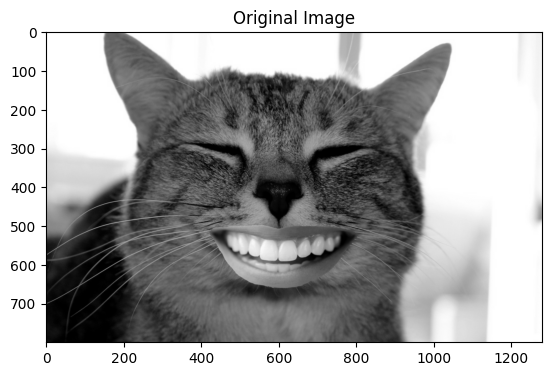

In [ ]:
# Importing the Libraries & Loading the Image
import cv2
import matplotlib.pyplot as plt
import numpy as np
image = cv2.imread('/cat.png', cv2.IMREAD_GRAYSCALE)
plt.title('Original Image')
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
print('Original Image Shape:', image.shape)

**Identity Kernel Using Library Function**

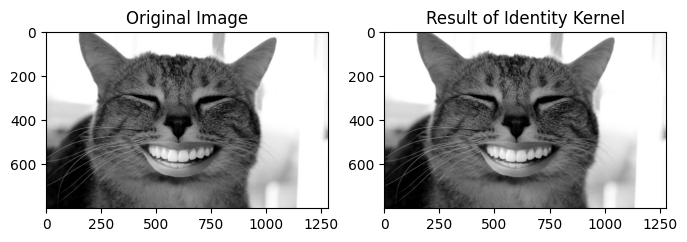

In [ ]:
#Identity Kernel Filter
kernel1 = np.array([[0, 0, 0],
                    [0, 1, 0],
                    [0, 0, 0]])
identity = cv2.filter2D(src=image, ddepth=-1, kernel=kernel1)
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')
ax2.imshow(identity, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text('Result of Identity Kernel')

**Identity Kernel Without Using Library Function**

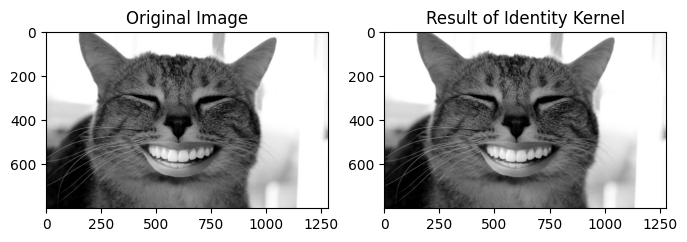

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load image (replace 'your_image.jpg' with your actual image path)
image = Image.open("/cat.png").convert("L")  # convert to grayscale
image = np.array(image, dtype=np.uint8)

# Identity Kernel
kernel = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
])

def manual_filter2D(img, kernel):
    kh, kw = kernel.shape
    pad_h, pad_w = kh // 2, kw // 2

    # Pad image with zeros
    padded_img = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)),
                        mode='constant', constant_values=0)

    output = np.zeros_like(img, dtype=np.float32)

    # Manual convolution
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            region = padded_img[i:i+kh, j:j+kw]
            output[i, j] = np.sum(region * kernel)

    return np.clip(output, 0, 255).astype(np.uint8)

# Apply the identity filter manually
identity = manual_filter2D(image, kernel)

# Plot results
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')

ax2.imshow(identity, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text('Result of Identity Kernel')

plt.show()


# Smoothing Spatial Filtering
* Image smoothing filters are applied to reduce the amount of noise in an image.
* This process involves convolution i.e. moving a kernel over the image pixels and computing new values.
1. Average Filter: Computes the average of the pixel values in the kernel.
2. Weighted Average Filter: Computes the weighted average of the pixel values in the kernel.
3. Median: Computes the median of all the pixel values in the kernel.
4. Minimum: Selects the least pixel value of all those in the kernel.
5. Maximum: Selects the highest pixel value of all those in the kernel.
6. Mid-Point: Computes the average of the maximum and minimum pixel values in the kernel.

**Standard Average Filtering Using Libray Function**

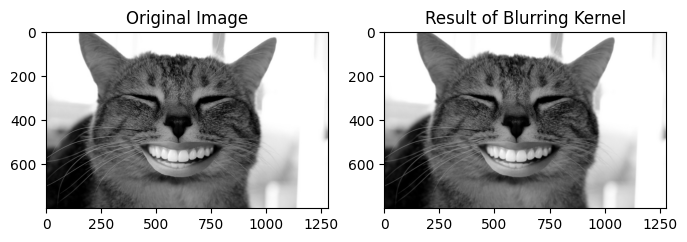

In [ ]:
# Image Blurring using a Custom Kernel
kernel1 = np.array([[1, 1, 1],
                    [1, 1, 1],
                    [1, 1, 1]])
kernel1=kernel1/9
blurr = cv2.filter2D(src=image, ddepth=-1, kernel=kernel1)
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')
ax2.imshow(blurr, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text('Result of Blurring Kernel')

**Standard Average Filtering Without Using Libray Function**

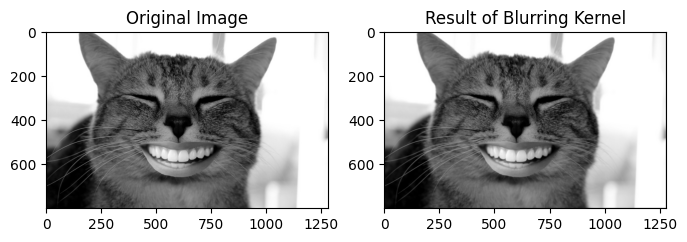

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load image (replace 'your_image.jpg' with your actual file path)
image = Image.open("/cat.png").convert("L")  # grayscale
image = np.array(image, dtype=np.uint8)

# Blurring Kernel (3x3 average filter)
kernel = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
], dtype=np.float32)
kernel = kernel / 9.0   # Normalize so the sum = 1

def manual_filter2D(img, kernel):
    kh, kw = kernel.shape
    pad_h, pad_w = kh // 2, kw // 2

    # Pad image with zeros
    padded_img = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)),
                        mode='constant', constant_values=0)

    output = np.zeros_like(img, dtype=np.float32)

    # Convolution
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            region = padded_img[i:i+kh, j:j+kw]
            output[i, j] = np.sum(region * kernel)

    return np.clip(output, 0, 255).astype(np.uint8)

# Apply blur manually
blurr = manual_filter2D(image, kernel)

# Show results
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')

ax2.imshow(blurr, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text('Result of Blurring Kernel')

plt.show()


**Maximum Filetering Using Library Function**

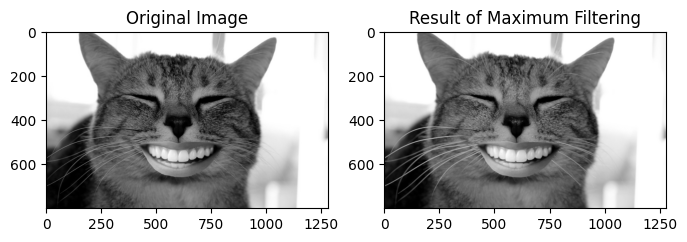

In [ ]:
kernel = np.ones((3,3),np.uint8)
# Perform maximum filtering convolution using dilation
max_filtered = cv2.dilate(image, kernel)
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')
ax2.imshow(max_filtered, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text('Result of Maximum Filtering')

**Maximum Filetering Without Using Library Function**

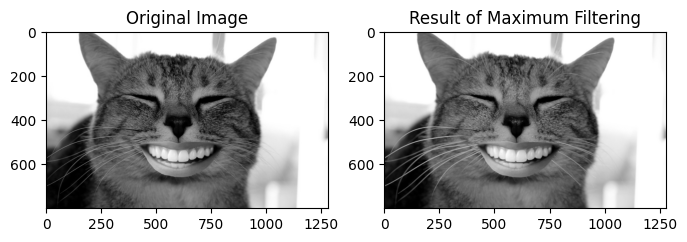

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load grayscale image
image = Image.open("/cat.png").convert("L")
image = np.array(image, dtype=np.uint8)

# Define kernel size (3x3 of ones)
kh, kw = 3, 3
pad_h, pad_w = kh // 2, kw // 2

# Pad image with zeros (to handle borders)
padded_img = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)),
                    mode='constant', constant_values=0)

# Output image
max_filtered = np.zeros_like(image, dtype=np.uint8)

# Perform maximum filtering (dilation)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        region = padded_img[i:i+kh, j:j+kw]
        max_filtered[i, j] = np.max(region)

# Plot results
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')

ax2.imshow(max_filtered, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text('Result of Maximum Filtering')

plt.show()


**Minimum Filtering Using Library Function**

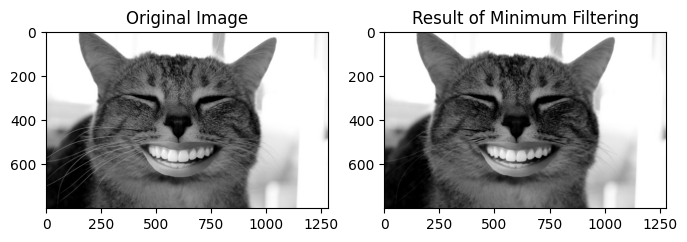

In [ ]:
kernel = np.ones((3,3),np.uint8)
# Perform maximum filtering convolution using dilation
min_filtered = cv2.erode(image, kernel)
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')
ax2.imshow(min_filtered, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text('Result of Minimum Filtering')

**Minimum Filtering Without Using Library Function**

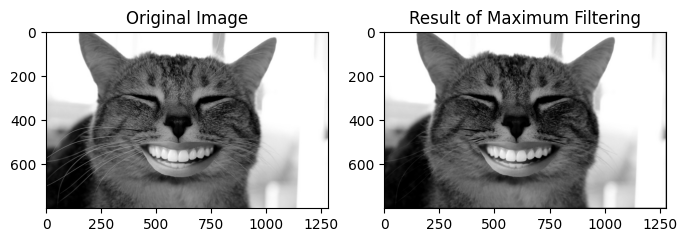

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load grayscale image
image = Image.open("/cat.png").convert("L")
image = np.array(image, dtype=np.uint8)

# Define kernel size (3x3 of ones)
kh, kw = 3, 3
pad_h, pad_w = kh // 2, kw // 2

# Pad image with zeros (to handle borders)
padded_img = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)),
                    mode='constant', constant_values=0)

# Output image
min_filtered = np.zeros_like(image, dtype=np.uint8)

# Perform maximum filtering (dilation)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        region = padded_img[i:i+kh, j:j+kw]
        min_filtered[i, j] = np.min(region)

# Plot results
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')

ax2.imshow(min_filtered, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text('Result of Maximum Filtering')

plt.show()


**Median Filtering Using Library Function**
* In median blurring, each pixel in the source image is replaced by the median value of the image pixels in the kernel area. In order to median blurring we can use **cv2.medianBlur(src, ksize)**
* This function has just two required arguments:
1. The first is the source image.
2. The second is the kernel size, which must be an odd, positive integer.

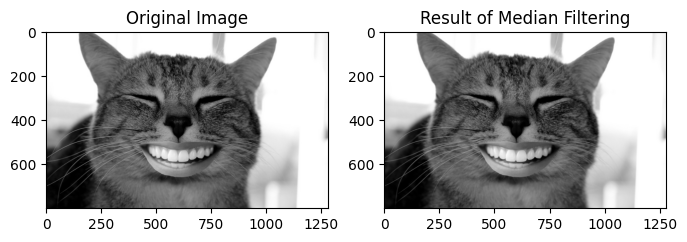

In [ ]:
# Perform Median blurring using cv2.filter2D
median_filtered = cv2.medianBlur(image, 3)
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')
ax2.imshow(median_filtered, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text('Result of Median Filtering')

**Median Filtering Without Using Library Function**

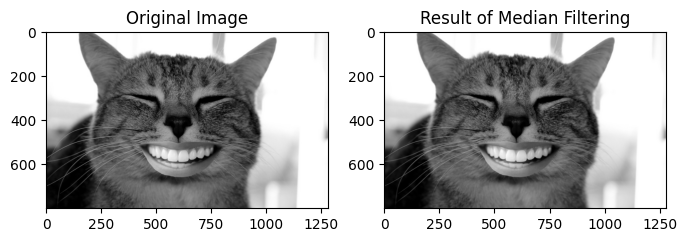

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load grayscale image
image = Image.open("/cat.png").convert("L")
image = np.array(image, dtype=np.uint8)

# Kernel size for median filter
k = 3
pad = k // 2

# Pad the image with zeros
padded_img = np.pad(image, ((pad, pad), (pad, pad)),
                    mode='constant', constant_values=0)

# Output image
median_filtered = np.zeros_like(image, dtype=np.uint8)

# Apply median filtering
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        region = padded_img[i:i+k, j:j+k].flatten()  # extract region and flatten to 1D
        median_filtered[i, j] = np.median(region)    # take the median

# Show results
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')

ax2.imshow(median_filtered, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text('Result of Median Filtering')

plt.show()


**Weighted Averaging Filter Using Library Function**

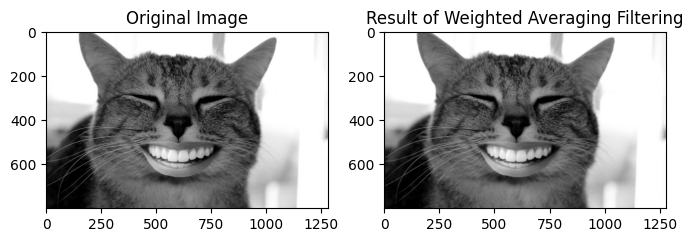

In [ ]:
kernel = np.array([[1, 2, 1],
                   [2, 4, 2],
                   [1, 2, 1]]) / 16.0
weighted_filter = cv2.filter2D(image, -1, kernel)
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')
ax2.imshow(weighted_filter, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text('Result of Weighted Averaging Filtering')

**Weighted Averaging Filter Without Using Library Function**

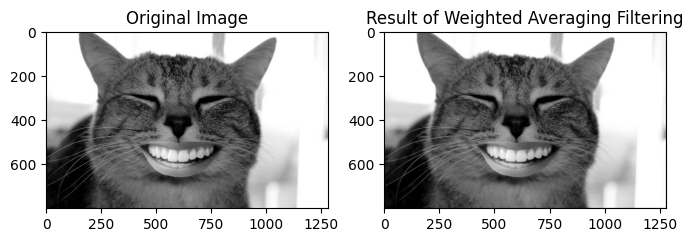

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load grayscale image
image = Image.open("/cat.png").convert("L")
image = np.array(image, dtype=np.uint8)

# Weighted averaging kernel (3x3)
kernel = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
], dtype=np.float32) / 16.0

kh, kw = kernel.shape
pad_h, pad_w = kh // 2, kw // 2

# Pad image with zeros
padded_img = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)),
                    mode='constant', constant_values=0)

# Output image
weighted_filter = np.zeros_like(image, dtype=np.float32)

# Apply weighted filtering manually
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        region = padded_img[i:i+kh, j:j+kw]
        weighted_filter[i, j] = np.sum(region * kernel)

# Clip values to 0–255 and convert to uint8
weighted_filter = np.clip(weighted_filter, 0, 255).astype(np.uint8)

# Show results
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')

ax2.imshow(weighted_filter, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text('Result of Weighted Averaging Filtering')

plt.show()


**Smoothing with Gaussian Filter**
* The effect of applying the Gaussian filter is to blur an image and remove detail and noise.
* It uses a kernel that represents the shape of a Gaussian or bell-shaped hump.
* The Gaussian filter outputs a weighted average of each pixel’s neighborhood, with the average weighted more towards the value of the central pixels.
* In order to perform this we can use **cv2.GaussianBlur(src, ksize, sigmaX)**

* We should specify the width and height of the kernel which should be positive and odd.
* We also should specify the standard deviation in the X and Y directions, sigmaX and sigmaY respectively.
* If only sigmaX is specified, sigmaY is taken as the same as sigmaX.
* If both are given as zeros, they are calculated from the kernel size. Gaussian blurring is highly effective in removing Gaussian noise from an image.

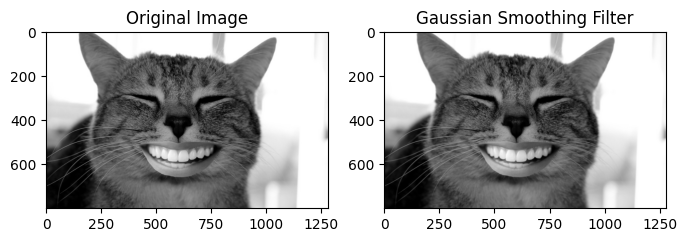

In [ ]:
gaussian_filter = cv2.GaussianBlur(image, (3,3), 0)
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')
ax2.imshow(gaussian_filter, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text('Gaussian Smoothing Filter')

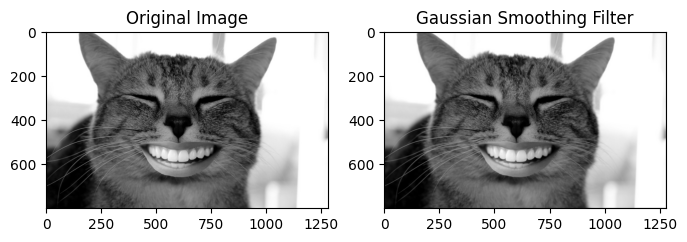

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load grayscale image
image = Image.open("/cat.png").convert("L")
image = np.array(image, dtype=np.uint8)

# 3x3 Gaussian kernel
kernel = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
], dtype=np.float32) / 16.0

kh, kw = kernel.shape
pad_h, pad_w = kh // 2, kw // 2

# Pad image with zeros
padded_img = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)),
                    mode='constant', constant_values=0)

# Output image
gaussian_filter = np.zeros_like(image, dtype=np.float32)

# Apply Gaussian smoothing manually
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        region = padded_img[i:i+kh, j:j+kw]
        gaussian_filter[i, j] = np.sum(region * kernel)

# Clip and convert to uint8
gaussian_filter = np.clip(gaussian_filter, 0, 255).astype(np.uint8)

# Show results
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')

ax2.imshow(gaussian_filter, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text('Gaussian Smoothing Filter')

plt.show()


# **Sharpening Spatial Filtering**
* Image sharpening involves emphasizing details and enhances the edges of objects in an image.
1. Laplace Filter
2. Unsharp Mask & HighBoost Filtering
3. Gradient Mask filtering (Sobel Operator)

**Laplacian Filtering Using Library Function**

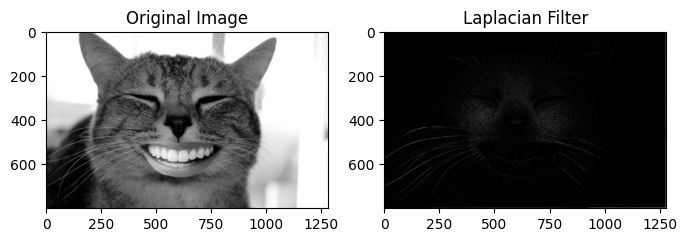

In [ ]:
# Importing the Libraries & Loading the Image
import cv2
import matplotlib.pyplot as plt
import numpy as np
image = cv2.imread('/nature.jpg', cv2.IMREAD_GRAYSCALE)
# Laplace Filter
kernel = np.array([[0, 1, 0],
                   [1,-4, 1],
                   [0, 1, 0]])

laplacian = cv2.filter2D(image, -1, kernel)
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')
ax2.imshow(laplacian, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text('Laplacian Filter')

**Unsharp Masking and Highboost Filtering**

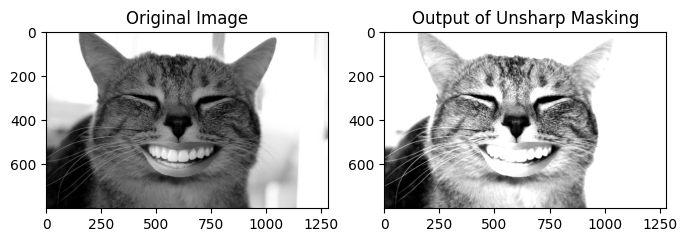

In [ ]:
# Gaussian Blur
gaussian_blur = cv2.GaussianBlur(image, (7,7), 0)
#Mask
mask = cv2.subtract(image, gaussian_blur)
k = 1
output_image = cv2.addWeighted(image, 1 + k, mask, -k, 0)
# Displaying Results
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax5 = fig.add_subplot(122)
ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')
ax5.imshow(output_image, cmap='gray', vmin=0, vmax=255)
ax5.title.set_text('Output of Unsharp Masking')

**Highboost Filtering**

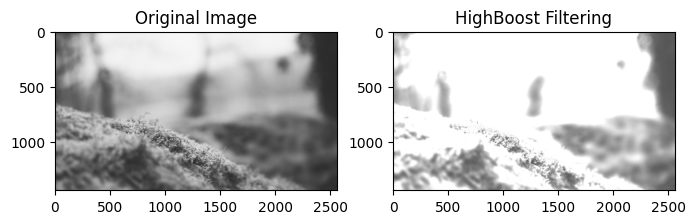

In [ ]:
# HighBoost Filtering
kernel = np.array([[-1, -1, -1],
                   [-1,  9, -1],
                   [-1, -1, -1]])
highboost = cv2.filter2D(image, -1, kernel)
# Displaying Results
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax5 = fig.add_subplot(122)
ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')
ax5.imshow(output_image, cmap='gray', vmin=0, vmax=255)
ax5.title.set_text('HighBoost Filtering')

**Sobel Operator**

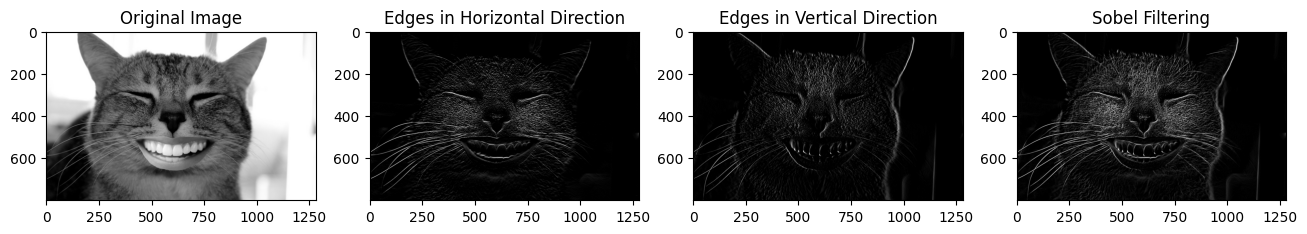

In [ ]:
#Horizontal Edge Detection
sobel_h = np.array([[-1, -2, -1],
                         [0, 0, 0],
                         [1, 2, 1]])

# Apply kernel to image using cv2.filter2D
horizontal_edges = cv2.filter2D(image, -1, sobel_h).astype(np.float32)
#Vertical Edge Detection
sobel_v = np.array([[-1, 0, 1],
                         [-2, 0, 2],
                         [-1, 0, 1]])

# Apply kernel to image using cv2.filter2D
vertical_edges = cv2.filter2D(image, -1, sobel_v).astype(np.float32)
#Both in Vertical and Horizontal Direction
sobel = cv2.magnitude(vertical_edges, horizontal_edges)
fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)
ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')
ax2.imshow(horizontal_edges, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text('Edges in Horizontal Direction')
ax3.imshow(vertical_edges, cmap='gray', vmin=0, vmax=255)
ax3.title.set_text('Edges in Vertical Direction')
ax4.imshow(sobel, cmap='gray', vmin=0, vmax=255)
ax4.title.set_text('Sobel Filtering')

Laplacian Filtering Without Using Library Function

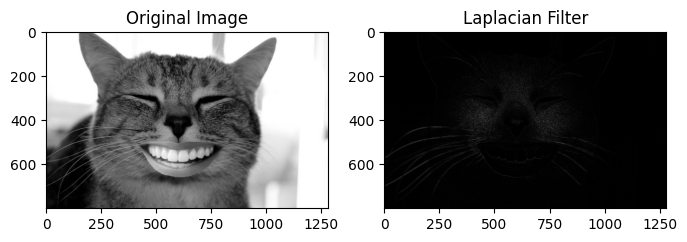

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load grayscale image
image = Image.open("/cat.png").convert("L")
image = np.array(image, dtype=np.uint8)

# Laplacian kernel
kernel = np.array([
    [0,  1, 0],
    [1, -4, 1],
    [0,  1, 0]
], dtype=np.float32)

kh, kw = kernel.shape
pad_h, pad_w = kh // 2, kw // 2

# Pad image with zeros
padded_img = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)),
                    mode='constant', constant_values=0)

# Output image
laplacian = np.zeros_like(image, dtype=np.float32)

# Manual convolution
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        region = padded_img[i:i+kh, j:j+kw]
        laplacian[i, j] = np.sum(region * kernel)

# Clip values to 0–255 and convert to uint8
laplacian = np.clip(laplacian, 0, 255).astype(np.uint8)

# Display results
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')

ax2.imshow(laplacian, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text('Laplacian Filter')

plt.show()


Unsharp Masking and Highboost Filtering Without Using Library Function

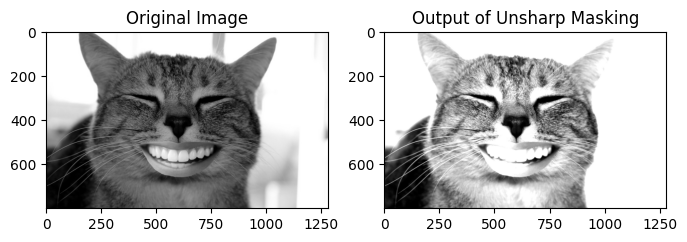

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load grayscale image
image = Image.open("/cat.png").convert("L")
image = np.array(image, dtype=np.uint8)

# Step 1: Gaussian Blur (3x3 or 7x7 kernel approximation)
def gaussian_kernel(size, sigma=1.0):
    """Generate a normalized Gaussian kernel."""
    ax = np.arange(-size // 2 + 1., size // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2. * sigma**2))
    kernel = kernel / np.sum(kernel)
    return kernel

# Example: 7x7 Gaussian kernel
kernel = gaussian_kernel(7, sigma=1.0)

# Pad image
pad = kernel.shape[0] // 2
padded_img = np.pad(image, ((pad, pad), (pad, pad)), mode='constant', constant_values=0)

# Convolve to get blurred image
blurred = np.zeros_like(image, dtype=np.float32)
kh, kw = kernel.shape
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        region = padded_img[i:i+kh, j:j+kw]
        blurred[i, j] = np.sum(region * kernel)

blurred = np.clip(blurred, 0, 255)

# Step 2: Mask = original - blurred
mask = image.astype(np.float32) - blurred

# Step 3: Unsharp masking
k = 1.0
output_image = image.astype(np.float32) * (1 + k) - mask * k
output_image = np.clip(output_image, 0, 255).astype(np.uint8)

# Display results
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')

ax2.imshow(output_image, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text('Output of Unsharp Masking')

plt.show()


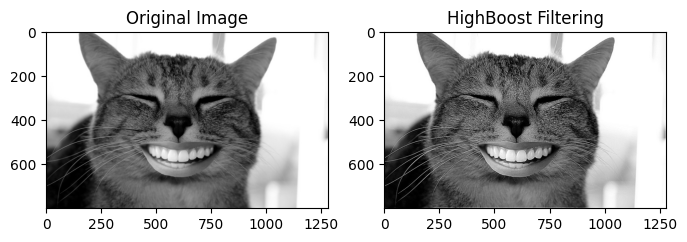

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load grayscale image
image = Image.open("/cat.png").convert("L")
image = np.array(image, dtype=np.uint8)

# High-Boost kernel
kernel = np.array([
    [-1, -1, -1],
    [-1,  9, -1],
    [-1, -1, -1]
], dtype=np.float32)

kh, kw = kernel.shape
pad_h, pad_w = kh // 2, kw // 2

# Pad image
padded_img = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

# Output image
highboost = np.zeros_like(image, dtype=np.float32)

# Apply convolution manually
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        region = padded_img[i:i+kh, j:j+kw]
        highboost[i, j] = np.sum(region * kernel)

# Clip values to 0–255
highboost = np.clip(highboost, 0, 255).astype(np.uint8)

# Display results
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')

ax2.imshow(highboost, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text('HighBoost Filtering')

plt.show()


Sobel Operator application without Library Function

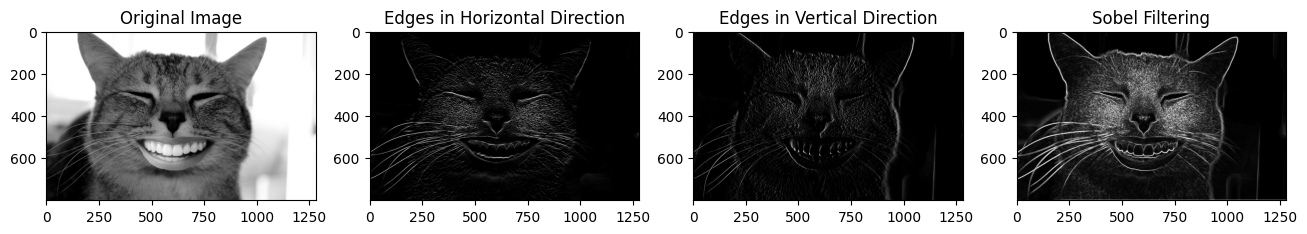

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load grayscale image
image = Image.open("/cat.png").convert("L")
image = np.array(image, dtype=np.uint8)

# Sobel Kernels
sobel_h = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]], dtype=np.float32)

sobel_v = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]], dtype=np.float32)

kh, kw = sobel_h.shape
pad_h, pad_w = kh // 2, kw // 2

# Pad image
padded_img = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

# Output images
horizontal_edges = np.zeros_like(image, dtype=np.float32)
vertical_edges   = np.zeros_like(image, dtype=np.float32)

# Convolution for horizontal and vertical edges
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        region = padded_img[i:i+kh, j:j+kw]
        horizontal_edges[i, j] = np.sum(region * sobel_h)
        vertical_edges[i, j]   = np.sum(region * sobel_v)

# Compute edge magnitude
sobel = np.sqrt(horizontal_edges**2 + vertical_edges**2)
sobel = np.clip(sobel, 0, 255).astype(np.uint8)
horizontal_edges = np.clip(horizontal_edges, 0, 255).astype(np.uint8)
vertical_edges = np.clip(vertical_edges, 0, 255).astype(np.uint8)

# Plot results
fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)

ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')

ax2.imshow(horizontal_edges, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text('Edges in Horizontal Direction')

ax3.imshow(vertical_edges, cmap='gray', vmin=0, vmax=255)
ax3.title.set_text('Edges in Vertical Direction')

ax4.imshow(sobel, cmap='gray', vmin=0, vmax=255)
ax4.title.set_text('Sobel Filtering')

plt.show()
